# VISUALIZATION_2D

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

In [4]:
dataset = pd.read_csv('Diabetes.csv')
print(dataset.dtypes)
dataset.head()

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
cols = [c for c in dataset.columns if c not in ["pregnancies", "Outcomes"]]
dataset = dataset.copy()
dataset[cols] = dataset[cols].replace({0: np.NaN})
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,657.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,268.0
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,1.0
std,3.217291,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.0
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,1.0
25%,2.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,1.0
50%,4.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,1.0
75%,7.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.0
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.0


# Scatter Matrix

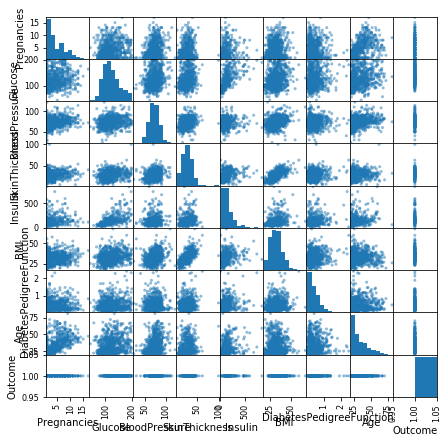

In [8]:
pd.plotting.scatter_matrix(dataset,figsize =(7,7));

D:\anaconda\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
D:\anaconda\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
D:\anaconda\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


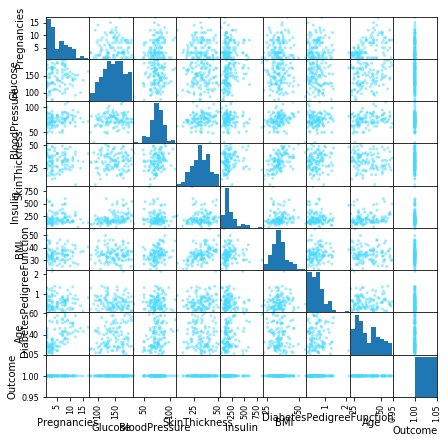

In [10]:
dataset_2 = dataset.dropna()
colors = dataset_2["Outcome"].map(lambda x: '#44d9ff' if x else '#f95b4a')
pd.plotting.scatter_matrix(dataset_2,figsize =(7,7),color = colors);

# correlation_plots

In [11]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.166329,0.285013,0.167298,0.104081,0.128207,-0.006459,0.550525,NaN
Glucose,0.166329,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,NaN
BloodPressure,0.285013,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,NaN
SkinThickness,0.167298,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,NaN
Insulin,0.104081,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,NaN
BMI,0.128207,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,NaN
DiabetesPedigreeFunction,-0.006459,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,NaN
Age,0.550525,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,NaN
Outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


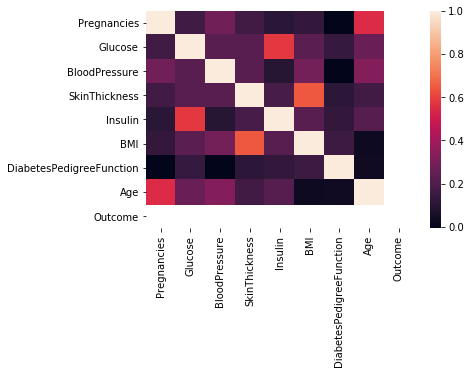

In [12]:
sb.heatmap(dataset.corr());

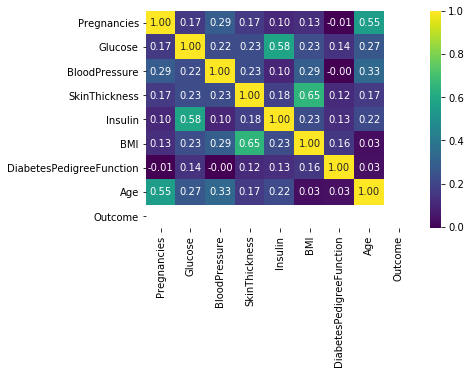

In [15]:
sb.heatmap(dataset.corr(), annot =True ,cmap= "viridis",fmt= "0.2f");

# 2D Histogram

In [16]:
df = pd.read_csv("height_weight.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     4231 non-null   int64  
 1   height  4231 non-null   float64
 2   weight  4231 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 99.3 KB


,sex,height,weight
count,4231.000000,4231.000000,4231.000000
mean,1.540061,66.903607,174.095122
std,0.498451,4.313004,38.896171
min,1.000000,55.400000,96.590000
25%,1.000000,63.730000,144.315000
50%,2.000000,66.630000,170.100000
75%,2.000000,69.970000,198.660000
max,2.000000,79.610000,298.440000


Text(0, 0.5, 'Weight')

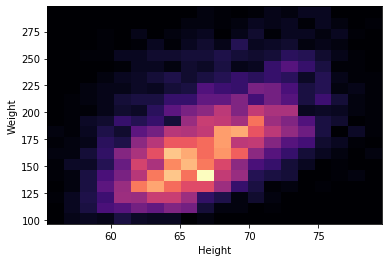

In [19]:
plt.hist2d(df["height"],df["weight"],bins =20,cmap = "magma")
plt.xlabel("Height")
plt.ylabel("Weight")


# CONTOUR PLOT

Text(0, 0.5, 'Weight')

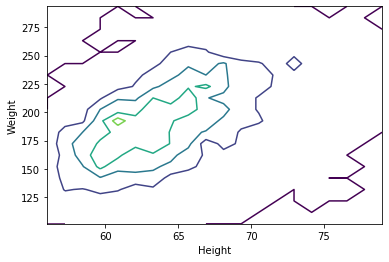

In [29]:
hist,x_edge,y_edge = np.histogram2d(df["height"],df["weight"],bins = 20)
x_center = 0.5 * (x_edge[1:] + x_edge[:-1]) 
y_center = 0.5 * (y_edge[1:] + y_edge[:-1])
plt.contour(x_center , y_center, hist,levels = 4)
plt.xlabel("Height")
plt.ylabel("Weight")                                    


# KDE 

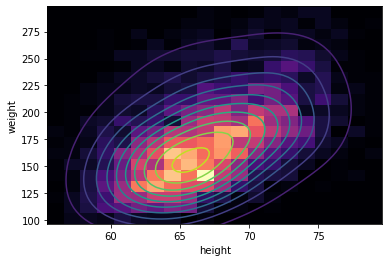

In [36]:
sb.kdeplot(df["height"],df["weight"],cmap = "viridis", bw= (2,20))
plt.hist2d(df["height"],df["weight"],bins =20,cmap = "magma");

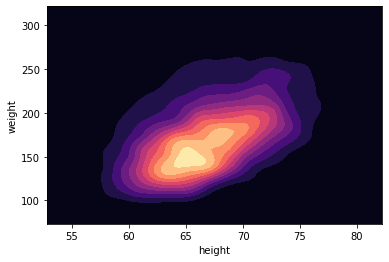

In [37]:
sb.kdeplot(df["height"],df["weight"],cmap = "magma", shade= True)

# In Defense of Simplicity

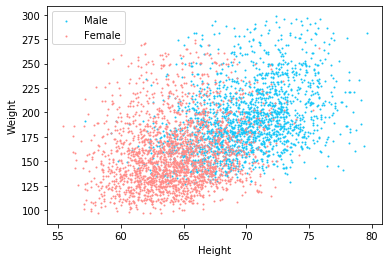

In [40]:
 m = df["sex"]== 1
plt.scatter(df.loc[m,"height"], df.loc[m,"weight"], c= '#16c6f7',s =1, label ='Male')
plt.scatter(df.loc[~m,"height"], df.loc[~m,"weight"], c= '#ff8b87',s =1,label ='Female')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(loc= 2)

# Treating points with probabilty

In [52]:
params = ["height", "weight"]
male = df.loc[m, params].values
female = df.loc[~m, params].values
male.shape

(1946, 2)

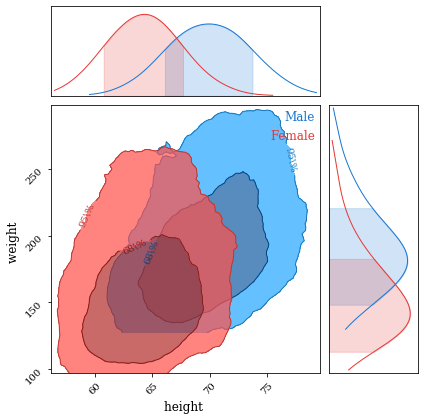

In [53]:
from chainconsumer import ChainConsumer
c = ChainConsumer()
c.add_chain(male, parameters=params, name="Male", kde=1.0, color="b")
c.add_chain(female, parameters=params, name="Female", kde=1.0, color="r")
c.configure(contour_labels="confidence", usetex=False)
c.plotter.plot(figsize=2.0);

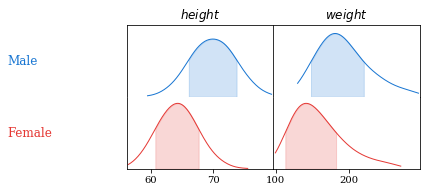

In [57]:
c.plotter.plot_summary(figsize=2.0);